In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itables import show
import itables.options as opt
import geopandas as gpd

Wczytanie danych

In [6]:
data = pd.read_excel('who_aap_2021_v9_11august2022.xlsx', sheet_name='AAP_2022_city_v9')

print(data.head())

                     WHO Region ISO3 WHO Country Name City or Locality  \
0  Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1               European Region  ALB          Albania           Durres   
2               European Region  ALB          Albania           Durres   
3               European Region  ALB          Albania          Elbasan   
4               European Region  ALB          Albania          Elbasan   

   Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
0              2019         119.77           NaN          NaN   
1              2015            NaN         17.65        26.63   
2              2016          14.32         24.56        24.78   
3              2015            NaN           NaN        23.96   
4              2016            NaN           NaN        26.26   

   PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
0                        18.0                         NaN   
1                         NaN             

In [10]:
data = data.rename(columns={
    'WHO Region': 'region', 
    'ISO3': 'country_code',
    'WHO Country Name': 'country_name',
    'City or Locality': 'city',
    'Measurement Year': 'year',
    'PM2.5 (μg/m3)': 'PM2.5',
    'PM10 (μg/m3)': 'PM10', 
    'NO2 (μg/m3)': 'NO2',
    'PM25 temporal coverage (%)': '%PM2.5',
    'PM10 temporal coverage (%)': '%PM10',
    'NO2 temporal coverage (%)': '%NO2', 
    'Reference': 'reference',
    'Number and type of monitoring stations': 'number_type_stations', 
    'Version of the database': 'db_version',
    'Status': 'status'
    })

print(data.columns)


Index(['region', 'country_code', 'country_name', 'city', 'year', 'PM2.5',
       'PM10', 'NO2', '%PM2.5', '%PM10', '%NO2', 'reference',
       'number_type_stations', 'db_version', 'status'],
      dtype='object')


Braki w danych, informacja o ilości danych

In [13]:
missing_data = data.isnull().sum()
print("Ilość brakujących danych w każdej kolumnie:")
print(missing_data)

total_data = data.size
print("\nCałkowita ilość danych:", total_data)

Ilość brakujących danych w każdej kolumnie:
region                      1
country_code                0
country_name                0
city                        0
year                        0
PM2.5                   17143
PM10                    11082
NO2                      9991
%PM2.5                  24916
%PM10                   26810
%NO2                    12301
reference                   5
number_type_stations    23433
db_version                  0
status                  32191
dtype: int64

Całkowita ilość danych: 482865


### EDA - region

Podstawowe statystyki opisowe na poziomie regionów (dla PM2.5, PM10, NO2)

In [14]:
region_stats = data.groupby('region')[['PM2.5', 'PM10', 'NO2']].describe(percentiles=[0.25, 0.5, 0.75])
print("Statystyki opisowe na poziomie regionu:")
print(region_stats)

Statystyki opisowe na poziomie regionu:
                               PM2.5                                       \
                               count       mean        std   min      25%   
region                                                                      
African Region                 125.0  27.257120  20.435911  4.05  15.1600   
Eastern Mediterranean Region   221.0  38.063258  19.843202  8.12  26.2000   
European Region               7591.0  14.002193   6.315753  0.01   9.8500   
Region of the Americas        2120.0  11.389410   8.387063  1.80   6.0000   
South East Asia Region         553.0  42.841212  23.432654  7.00  27.3600   
Western Pacific Region        4438.0  40.324123  18.012102  2.10  28.1125   

                                                         PM10              \
                                50%      75%     max    count        mean   
region                                                                      
African Region                22.86

PM2.5 - analiza na wykresach

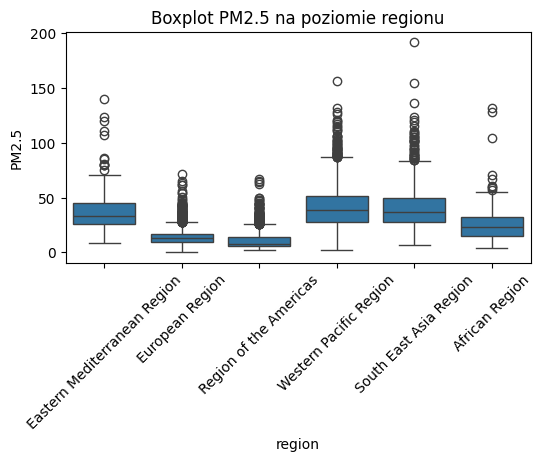

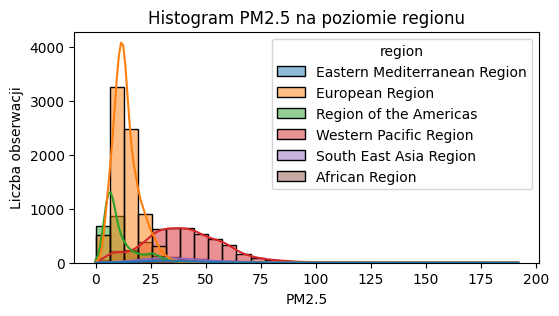

In [21]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x='region', y='PM2.5')
plt.title('Boxplot PM2.5 na poziomie regionu')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data=data, x='PM2.5', hue='region', kde=True, bins=30)
plt.title('Histogram PM2.5 na poziomie regionu')
plt.xlabel('PM2.5')
plt.ylabel('Liczba obserwacji')
plt.show()

PM 10 - analiza na wykresach

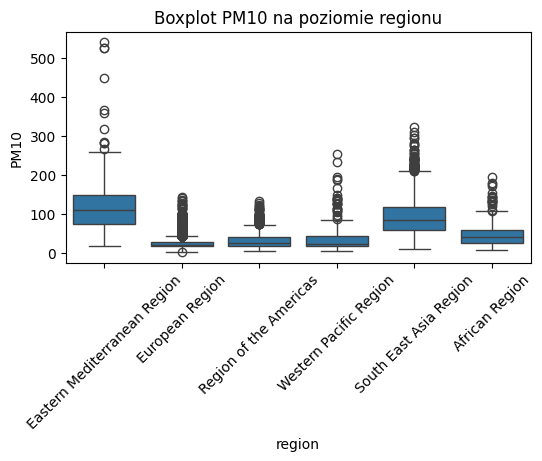

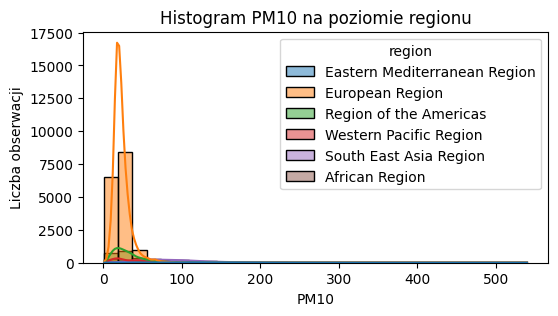

In [22]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x='region', y='PM10')
plt.title('Boxplot PM10 na poziomie regionu')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data=data, x='PM10', hue='region', kde=True, bins=30)
plt.title('Histogram PM10 na poziomie regionu')
plt.xlabel('PM10')
plt.ylabel('Liczba obserwacji')
plt.show()

NO2 - analiza na wykresach

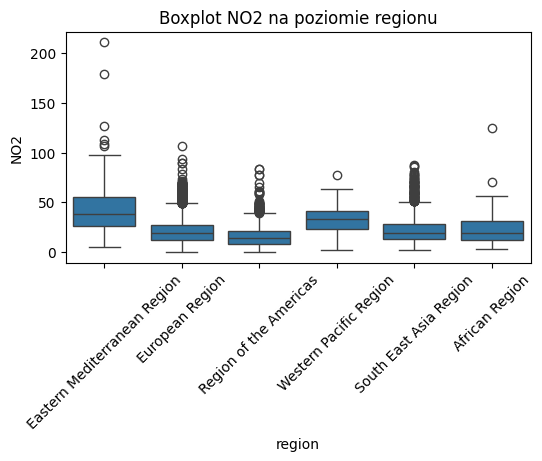

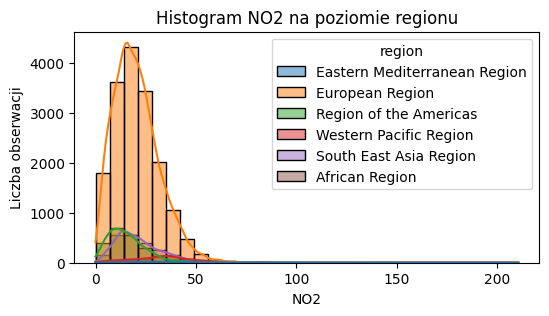

In [23]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x='region', y='NO2')
plt.title('Boxplot NO2 na poziomie regionu')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data=data, x='NO2', hue='region', kde=True, bins=30)
plt.title('Histogram NO2 na poziomie regionu')
plt.xlabel('NO2')
plt.ylabel('Liczba obserwacji')
plt.show()

Heatmapa dla regionów

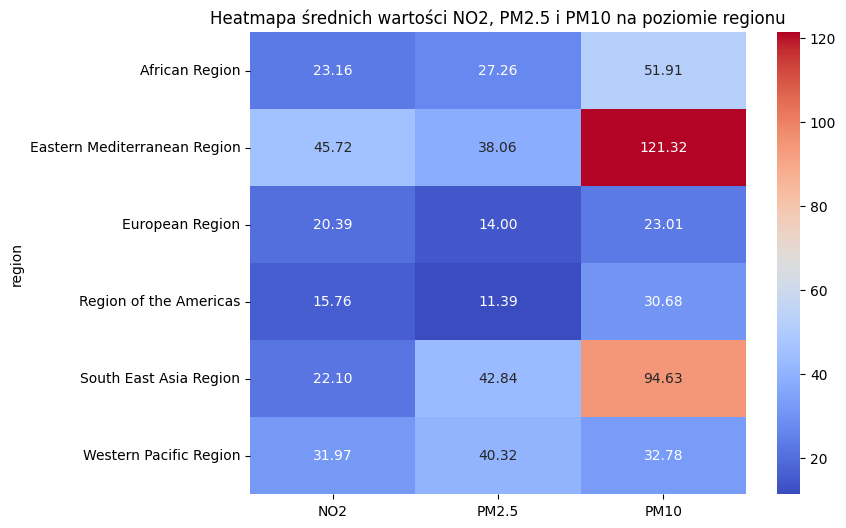

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(region_stats[['NO2', 'PM2.5', 'PM10']].xs('mean', level=1, axis=1), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmapa średnich wartości NO2, PM2.5 i PM10 na poziomie regionu')
plt.show()

### EDA - kraje

Podstawowe statystyki opisowe na poziomie krajów (dla PM2.5, PM10, NO2)

In [24]:
country_stats = data.groupby('country_name')[['PM2.5', 'PM10', 'NO2']].describe(percentiles=[0.25, 0.5, 0.75])
print("Statystyki opisowe na poziomie kraju:")
print(country_stats.head())

Statystyki opisowe na poziomie kraju:
             PM2.5                                                          \
             count     mean       std     min       25%      50%       75%   
country_name                                                                 
Afghanistan    1.0  119.770       NaN  119.77  119.7700  119.770  119.7700   
Albania        5.0   19.372  9.370908   10.32   13.2400   14.320   28.6400   
Algeria        1.0   21.530       NaN   21.53   21.5300   21.530   21.5300   
Andorra        0.0      NaN       NaN     NaN       NaN      NaN       NaN   
Argentina      2.0   10.185  0.106066   10.11   10.1475   10.185   10.2225   

                      PM10             ...                   NO2             \
                 max count       mean  ...      75%    max count       mean   
country_name                           ...                                    
Afghanistan   119.77   0.0        NaN  ...      NaN    NaN   0.0        NaN   
Albania        30.34 

Kraje o najwyżzych i najniższych średnich zanieczyszczeniach

In [38]:
top_pm25 = country_stats[('PM2.5', 'mean')].nlargest(5)
top_pm10 = country_stats[('PM10', 'mean')].nlargest(5)
top_no2 = country_stats[('NO2', 'mean')].nlargest(5)

lowest_pm25 = country_stats[('PM2.5', 'mean')].nsmallest(5)
lowest_pm10 = country_stats[('PM10', 'mean')].nsmallest(5)
lowest_no2 = country_stats[('NO2', 'mean')].nsmallest(5)

print("Top 5 krajów z najwyższym PM2.5:\n", top_pm25)
print("\nTop 5 krajów z najwyższym PM10:\n", top_pm10)
print("\nTop 5 krajów z najwyższym NO2:\n", top_no2)

print("\nTop 5 krajów z najniższym PM2.5:\n", lowest_pm25)
print("\nTop 5 krajów z najniższym PM10:\n", lowest_pm10)
print("\nTop 5 krajów z najniższym NO2:\n", lowest_no2)

Top 5 krajów z najwyższym PM2.5:
 country_name
Afghanistan    119.770000
Cameroon        82.666667
Bangladesh      75.127000
Mongolia        73.865833
Tajikistan      71.520000
Name: (PM2.5, mean), dtype: float64

Top 5 krajów z najwyższym PM10:
 country_name
Pakistan    333.5425
Egypt       227.0000
Ghana       175.3750
Uganda      170.4000
Mongolia    169.2200
Name: (PM10, mean), dtype: float64

Top 5 krajów z najwyższym NO2:
 country_name
Iran (Islamic Republic of)    69.443902
Iraq                          53.527000
Lebanon                       53.000000
Bahrain                       51.625000
Mongolia                      46.400000
Name: (NO2, mean), dtype: float64

Top 5 krajów z najniższym PM2.5:
 country_name
Bahamas    4.163333
Iceland    5.588065
Estonia    6.018148
Sweden     6.165315
Finland    6.200472
Name: (PM2.5, mean), dtype: float64

Top 5 krajów z najniższym PM10:
 country_name
Bahamas     4.650000
Iceland    10.614054
Estonia    12.723000
Finland    12.739095
Canad

Wykorzystanie it tables

In [43]:
opt.classes = "display compact"
opt.columnDefs = [{"className": "dt-center", "targets": "_all"}]
opt.lengthMenu = [10, 25, 50, 100]

show(country_stats)

Nie znałem wcześniej narzędzia ittables, nigdy go nie używałem. Natomiast na pewno jest ono pomocne, zwłaszcza gdy ma sie do czynienia z danymi wielopoziomowymi, takimi jak te badane (poziomy: region, kraj, miasto). Narzędzie to umożliwia użytkownikowi sortowanie, filtrowanie i przeszukiwanie danych bezpośrednio w tabeli (nie trzeba po raz n-ty wpisywać print(xxxx.head), co znacznie przyspiesza pracę). Wydaje mi się jeszcze, iż przy małym zbiorze danych urzycie ittables to byłoby trochę przerostem nad treścią, natomiast w przypadku tych danych (32k rekordów) jest to pomocne narzędzie.
Dodam jeszcze, że zaskoczyło mnie, że tabela się nie zacina, działa bardzo, bardzo szybko.

Podstawowe statystyki opisowe na poziomie miast (dla PM2.5, PM10, NO2)

In [25]:
city_stats = data.groupby('city')[['PM2.5', 'PM10', 'NO2']].describe(percentiles=[0.25, 0.5, 0.75])
print("Statystyki opisowe na poziomie miasta:")
print(city_stats.head())

Statystyki opisowe na poziomie miasta:
         PM2.5                                                          PM10  \
         count    mean       std    min      25%    50%     75%    max count   
city                                                                           
A Coruna   6.0  14.125  0.932968  13.16  13.6675  13.99  14.125  15.88   7.0   
Aachen     0.0     NaN       NaN    NaN      NaN    NaN     NaN    NaN   7.0   
Aadorf     0.0     NaN       NaN    NaN      NaN    NaN     NaN    NaN   7.0   
Aalborg    5.0  11.504  3.508309   8.13   9.5600  11.01  11.500  17.32   0.0   
Aalen      0.0     NaN       NaN    NaN      NaN    NaN     NaN    NaN   8.0   

                     ...                  NO2                              \
               mean  ...     75%    max count       mean       std    min   
city                 ...                                                    
A Coruna  25.647143  ...  27.195  27.76   7.0  21.651429  3.463151  18.34   
Aachen    20

In [42]:
opt.classes = "display compact"
opt.columnDefs = [{"className": "dt-center", "targets": "_all"}]
opt.lengthMenu = [10, 25, 50, 100]

show(city_stats)

Zbiorcza tabela przy pomocy ittables

In [44]:
opt.classes = "display compact"
opt.columnDefs = [{"className": "dt-center", "targets": "_all"}]
opt.lengthMenu = [10, 25, 50, 100]

show(data)

### MAPY

Mapy (shapefiles) pobrałem ze strony: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

Mapa z podziałem na regiony dla PM2.5

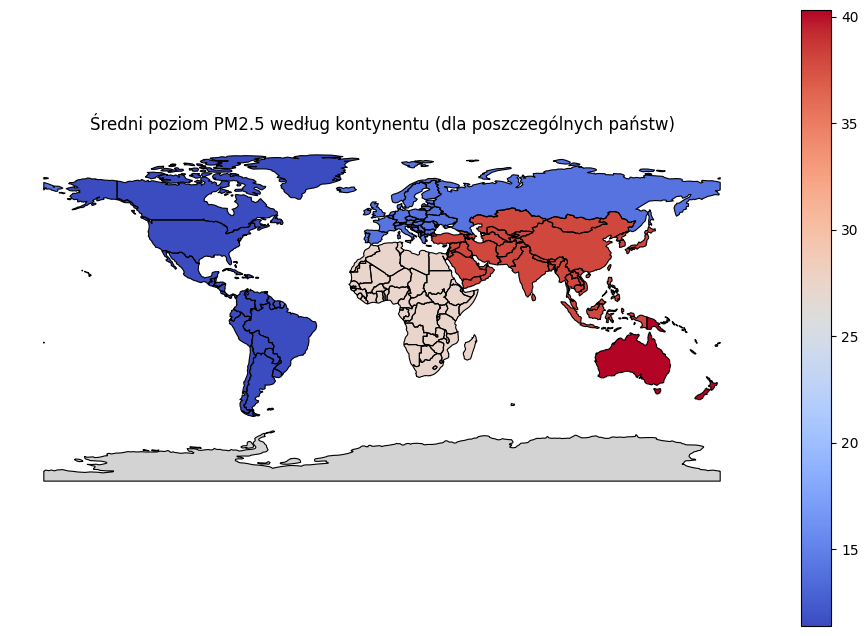

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

region_means = data.groupby('region')['PM2.5'].mean()
region_means_dict = region_means.to_dict()

continent_no2 = {
    'Africa': region_means_dict.get('African Region', None),
    'Asia': region_means_dict.get('Eastern Mediterranean Region', None), 
    'Europe': region_means_dict.get('European Region', None),
    'North America': region_means_dict.get('Region of the Americas', None),
    'South America': region_means_dict.get('Region of the Americas', None),
    'Oceania': region_means_dict.get('Western Pacific Region', None)
}

continent_df = pd.DataFrame(list(continent_no2.items()), columns=['CONTINENT', 'PM2.5_mean'])

world = world.merge(continent_df, on='CONTINENT', how='left')

fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=0.8, color='black')
world.plot(column='PM2.5_mean', cmap='coolwarm', legend=True, ax=ax,
           missing_kwds={"color": "lightgrey", "label": "Brak danych"})
ax.set_title('Średni poziom PM2.5 według kontynentu (dla poszczególnych państw)')
ax.set_aspect('equal')  
plt.axis('off')
plt.show()

Mapa z podziałem na regiony dla PM10

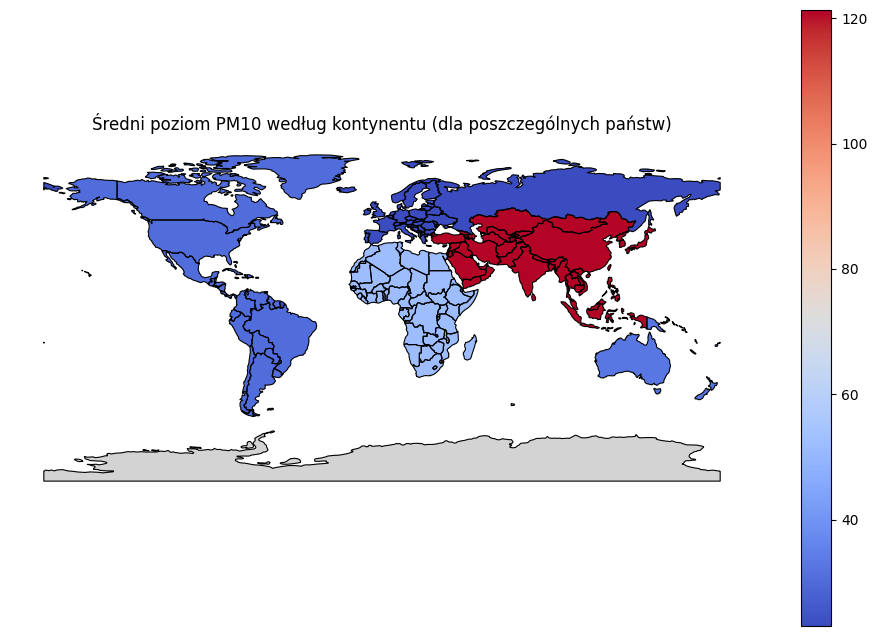

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

region_means = data.groupby('region')['PM10'].mean()
region_means_dict = region_means.to_dict()

continent_no2 = {
    'Africa': region_means_dict.get('African Region', None),
    'Asia': region_means_dict.get('Eastern Mediterranean Region', None), 
    'Europe': region_means_dict.get('European Region', None),
    'North America': region_means_dict.get('Region of the Americas', None),
    'South America': region_means_dict.get('Region of the Americas', None),
    'Oceania': region_means_dict.get('Western Pacific Region', None)
}

continent_df = pd.DataFrame(list(continent_no2.items()), columns=['CONTINENT', 'PM10_mean'])

world = world.merge(continent_df, on='CONTINENT', how='left')

fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=0.8, color='black')
world.plot(column='PM10_mean', cmap='coolwarm', legend=True, ax=ax,
           missing_kwds={"color": "lightgrey", "label": "Brak danych"})
ax.set_title('Średni poziom PM10 według kontynentu (dla poszczególnych państw)')
ax.set_aspect('equal')  
plt.axis('off')
plt.show()

Mapa z podziałem na regiony dla NO2

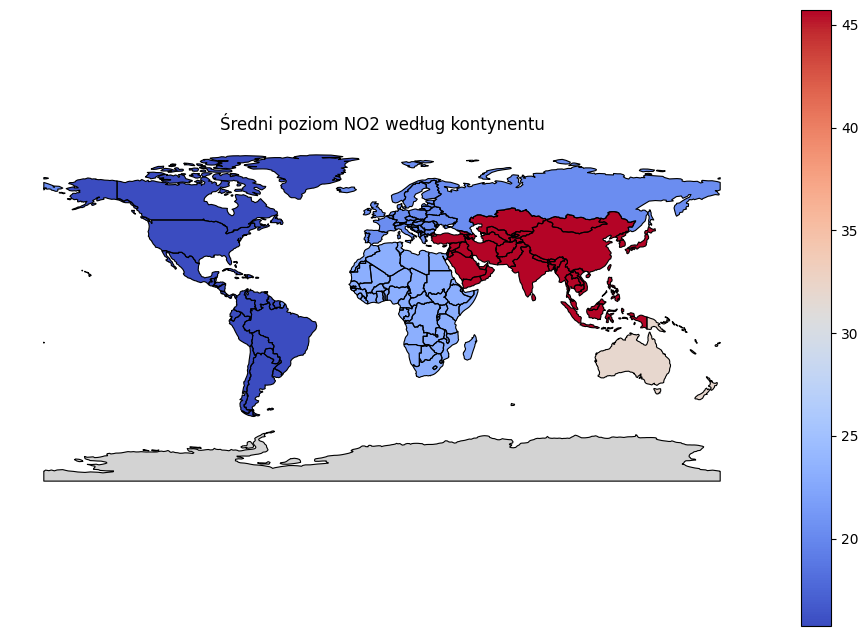

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

region_means = data.groupby('region')['NO2'].mean()
region_means_dict = region_means.to_dict()

continent_no2 = {
    'Africa': region_means_dict.get('African Region', None),
    'Asia': region_means_dict.get('Eastern Mediterranean Region', None), 
    'Europe': region_means_dict.get('European Region', None),
    'North America': region_means_dict.get('Region of the Americas', None),
    'South America': region_means_dict.get('Region of the Americas', None),
    'Oceania': region_means_dict.get('Western Pacific Region', None)
}

continent_df = pd.DataFrame(list(continent_no2.items()), columns=['CONTINENT', 'NO2_mean'])

world = world.merge(continent_df, on='CONTINENT', how='left')

fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=0.8, color='black')
world.plot(column='NO2_mean', cmap='coolwarm', legend=True, ax=ax,
           missing_kwds={"color": "lightgrey", "label": "Brak danych"})
ax.set_title('Średni poziom NO2 według kontynentu')
ax.set_aspect('equal')  
plt.axis('off')
plt.show()

WNIOSKI, ANALIZA, ZWIĄZKI PRZYCZYNOWO-SKUTKOWE

1. Azja jest zdecydowanie największym "producentem" zanieczyszczeń takich jak PM10, PM2.5 i NO2. Zapewne jest to związane z faktem, iż jest to najliczniejszy kontynent pod względem liczby mieszkańców. Szkoda, iż w danych nie było uwzględnione stężenie uwzględniające ilość mieszkańców, mogło by to dać więcej informacji na temat rozkładu tychże zanieczyszceń. 
2. Ameryka (obie) prdoukuje teoretycznie najmniej zanieczyszczeń, nieznacznie gorzej pod tym względem wygląda Europa i Australia i Oceania. 
3. Ilość brakujących danych jest mocno związana z sytuacją geopolityczną na świecie (dobrym przykładem jest masa wartości NaN w Afganistanie).
4. Kraje średnio/słabo rozwinięte charakteryzują się największym stężeniem zanieczyszczeń. Często są to również kraje przemysłowe. Przykładami są Ghana, Iran czy Pakistan.
5. Najwięcej pomiarów tworzą kraje wysokorozwinięte (głównie europejskie). Co ciekawe Polska wygląda bardzo dobrze na tym tle (dostarcza wiele pomiarów) 
6. Najbardziej zaniczyszczone miasta świata to miasta chińskie (zapewne przez ilość mieszkańców), a najmniej zanieczoszcone to miasta europejskie
7. Istnieje silny związek między stężeniem PM2.5, PM10 i NO2. Zwykle im większe stężenie jednego z nich, tym większe reszty
8. Wykonałem dosyć podstawowy proces EDA. Warto byłoby np. sprawdzić outliery (w danych środowiskowych często sie takowe znajdują), uzupełnić/usunąć/wyinterpolować dane brakujące (nie zrobiłem tego, gdyż podejście jest bardzo zależne od problemu jaki chcemy rozwiązać), a także przeprowadzić redukcję wymiarowości

Potencjalne zastosowania w kontekście ML:
- Predykcja jakości powietrza (przewidywanie przyszłych wartości stężenia PM2.5, PM10, NO2), dobrze by było dołożyć dane pogodowe (temperatura, wilgotność, wiatr)
- Klasyfikacja poziomu zagrożenia (np. "Dobra", "Umiarkowana", "Zła" itp.) uwzględniając aktualne normy WHO
- Wykrywanie anomalii w danych, czyli identyfikacja nietypowych pomiarów lub błędów pomiarowych
- Klasteryzacja/grupowanie miast/państw w zależności od tego jak bardzo wpływają na zanieczyszczenia